In [10]:
from GolfSimulator import *
%matplotlib notebook

<h1><center><font color='red'>The Lazy Man's Golf Simulator</center></h1></font>

<center><img src="YellingGolfer_clip-art.png"></center>

In the age of the coronavirus pandemic, golfers around the world are wondering when they will be able to get their next round in. Well, here's a solution! I call it the "Lazy Man's Golf Simulator." With this simulator, golfers from around the world will be able to hit the links once agian. But this time, you won't need clubs, balls, other extremely expensive golf gear, or even pants. You can play entirely in the comfort of your own home. All you need is a good attitude and some knowledge of how fast your initial velocity should be when "hitting" the ball. Moreover, this can all be done while maintaining the ever so important social distancing rules! 

The simulator is so realistic, it comes equipped with four holes that produce a random wind speed once you choose which hole you want to play. In addition, your virtual golf bag will include five (yes FIVE!) top of the line PGA tour approved irons. Furthermore, your simulator is so authentic, the algorithm takes into account the atmospheric density ($\rho = 0.075 \frac{lb}{ft^3}$), diameter of the ball ($R = 1.692 cm$), mass of the ball ($m = 1.62 oz$), and drag and lift coefficients ($C_D = 0.4$, $C_L = 0.0706$) to create the loft constant ($k_L = \frac{C_LA\rho}{2m} = 0.00041$) and drag constant ($k_D = \frac{C_DA\rho}{2m} = 0.00231$). And, of course, we can't forget about the gravitational constant ($g = 9.81 \frac{m}{s^2}$)

With these crucial constants stapled down, we can get to the fun part: acceleration of the ball in the $x, y, z$ directions. First, we must establish the velocity of the ball relative to the wind: $v_{rel} = \sqrt{v^2_{rx} + v^2_{ry} + v^2_{rz}}$. From here we can establish those acceleration equations:

$$\begin{eqnarray}
\frac{d^2x}{dt^2} = -k_Dv_{rel}v_{rx} + k_L(\omega_yv_{rz} - \omega_zv_{ry})\\
\frac{d^2y}{dt^2} = -k_Dv_{rel}v_{ry} + k_L(-\omega_zv_{rx})\\
\frac{d^2z}{dt^2} = -k_Dv_{rel}v_{rz} + k_L(-\omega_yv_{rx}) - g\\
\end{eqnarray}$$

Next, we need a way to update our varibles once the user inputs his/her initial ball speed and when the ball begins its flight. The 4th order Runge-Kutta algorithm updates the dependent variables at each time step (`h`) as follows:

$$\begin{eqnarray}
k_1& = &hf(r)\\
k_2& = &hf(r+\frac{1}{2}k_1)\\
k_3& = &hf(r+\frac{1}{2}k_2)\\
k_4& = &hf(r+k_3)\\
r& = & f(r) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)
\end{eqnarray}$$

The function, `f(r)` takes an input array of the the variables ($x, y, z, v_x, v_y, v_z, \theta, \phi, \omega_\theta, \omega_\phi$) that will be updated at each time step, and returns an array containing the derivative of each variable.

<h2><center><font color = 'purple'>Now let's see what happens when we "tee off"!!!</center></h2></font>

The first thing that will happen is it will prompt you with a question of what hole you want to play...

<font color = 'orange'>When selecting your hole, you will need to write out the hole number. For instance, if you wanted to play the first hole, you would input `"one"`, so let's see what happens when we run the `"chooseHole()"` fuction in the cell below and input `"one"`.</font>

In [11]:
print(chooseHole())

Here are the hole options:  ['Hole 1: 250 meters to the cup', 'Hole 2: 180 meters to the cup', 'Hole 3: 400 meters to the cup', 'Hole 4: 100 meters to the cup']
Which would you like to play: 
None


<h3><center><font color = 'orange'>There you have it! It provides the list of holes you can play, and prints the distance to the cup (in meters), followed by the random wind speed (in mph).</font></center></h3>

<font color = 'blue'>Once your hole is chosen, you are going to want to choose your club. It will show what clubs you have in your `"bag"`. To select a club simply type the club name. For example, if you want to use an 8 iron, simply input `"8I"`. For those of you that don't golf very often, the lower the iron, the lower the launch angle. If one were to choose the third hole (also the furthest hole at 400 meters), you would proabably want to play with a 4 iron, which provides the least loft and the most distance. Give it a try by running the `"chooseClub()"` function in the cell below.</font>

In [12]:
print(chooseClub())

Your bag:  ['9I', '8I', '7I', '6I', '5I', '4I']
Which club would you like: 
None


<h3><center><font color = 'blue'>Voila! It prints out the launch angle (in radians) at which the ball will take-off!</font></center></h3>

Now it will ask you what you want your initial ball speed to be. This will take some practice to master, but here's a hint: using an 8 iron on the first hole, an initial ball speed of 164 mph will get you a hole-in-one. However, differnt clubs and differnt holes require different speeds. For instance, if you are teeing off on the thrid hole and using a 4 iron, you're going to want your ball speed to be in the 250 mph to 300 mph range. It will then show you how much wind there is on that hole. If the direction is positive, that means the wind is going from left to right, and if it is a negative value, the wind is going from right to left. To deal with the wind, you will need to add some side spin to your ball. Obviously, if the wind directon is negative, then you want to input a positive side spin and if the wind direction is positive, then you want to input a negative side spin. Getting used to the wind can be difficult, so here is a hint: if the wind speed is -1 mph, you want to input a side spin of 67.5 rpm. 

<h3><center><font color = 'green'>Now you are ready to golf! Simply run the "teeOff()" function in the cell below and... BANG! You are basically on the PGA tour. When you have completed "hitting" the ball, the code will produce a graph of the trajectory in the form of an interactive 3D graph! Have fun!</font></center></h3>

Here are the hole options:  ['Hole 1: 250 meters to the cup', 'Hole 2: 180 meters to the cup', 'Hole 3: 400 meters to the cup', 'Hole 4: 100 meters to the cup']
Which would you like to play: example


<IPython.core.display.Javascript object>


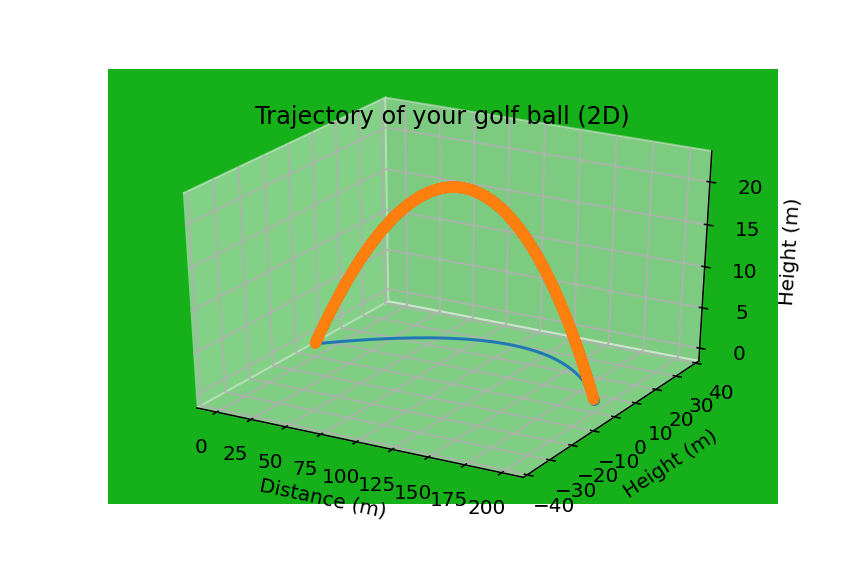

your ball landed  0.035894759765483286 meters from the cup
The distance to the cup was:  200
Your shot traveled 199.96410524023452 meters.
Amazing! + 10 points!
you have 10 points


In [13]:
teeOff()